In [2]:
import pandas as pd
data = pd.read_csv('train.csv')

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1    233
0     81
Name: Survived, dtype: int64
    男性   女性
0  468   81
1  109  233


Text(0, 0.5, '人数')

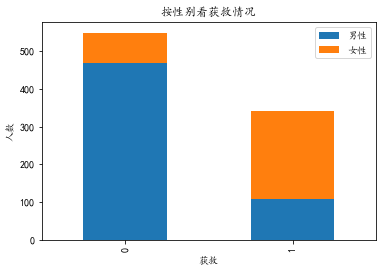

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline    
from pylab import mpl   
mpl.rcParams['font.sans-serif'] = ['Kaiti']


Survived_m = data.Survived[data.Sex == 'male'].value_counts() 
Survived_f = data.Survived[data.Sex == 'female'].value_counts()
print(Survived_f )
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
print(df)

df.plot(kind = 'bar', stacked = True)
plt.title(u'按性别看获救情况') 
plt.xlabel(u'获救')
plt.ylabel(u'人数')


    获救  未获救
S  217  427
C   93   75
Q   30   47


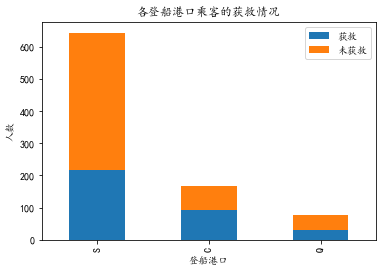

In [7]:
Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()

df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
print(df)
df.plot(kind = 'bar', stacked = True)
plt.title(u'各登船港口乘客的获救情况')
plt.xlabel(u'登船港口')
plt.ylabel(u'人数')
plt.show()

In [8]:
data.drop(['Name','PassengerId','Ticket','Cabin'], axis=1, inplace=True)

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean()) 

data_Em = data['Embarked'].value_counts()  
print(data_Em)
data['Embarked'].value_counts().index[0]

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

dumm = pd.get_dummies(data[['Sex','Embarked']], drop_first=True)
print(dumm.head())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
   Sex_male  Embarked_Q  Embarked_S
0         1           0           1
1         0           0           0
2         0           0           1
3         0           0           1
4         1           0           1


In [10]:
data = pd.concat([data, dumm], axis=1)
print(data.head())
data.drop(['Sex','Embarked'], axis=1, inplace=True)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Sex_male  \
0         0       3    male  22.0      1      0   7.2500        S         1   
1         1       1  female  38.0      1      0  71.2833        C         0   
2         1       3  female  26.0      0      0   7.9250        S         0   
3         1       1  female  35.0      1      0  53.1000        S         0   
4         0       3    male  35.0      0      0   8.0500        S         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [11]:
data['Age']=(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data['Fare']=(data['Fare']-data['Fare'].min())/( data['Fare'].max()-data['Fare'].min())
print(data.head())

   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  0.271174      1      0  0.014151         1           0   
1         1       1  0.472229      1      0  0.139136         0           0   
2         1       3  0.321438      0      0  0.015469         0           0   
3         1       1  0.434531      1      0  0.103644         0           0   
4         0       3  0.434531      0      0  0.015713         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [12]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)     
y = data.Survived                   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'liblinear') 

LR.fit(X_train, y_train)
y_test_pre = LR.predict(X_test) 
#print(y_test_pre)
test = pd.concat([X_test,y_test], axis=1)    
test['y_test_pred'] = y_test_pre   
print(test)

print('训练集准确率：\n', LR.score(X_train, y_train))
print('验证集准确率：\n', LR.score(X_test, y_test))

     Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
438       1  0.798944      1      4  0.513342         1           0   
196       3  0.367921      0      0  0.015127         1           1   
177       1  0.623021      0      0  0.056043         0           0   
97        1  0.283740      0      1  0.123667         1           0   
237       2  0.095250      0      2  0.051237         0           0   
..      ...       ...    ...    ...       ...       ...         ...   
450       2  0.447097      1      2  0.054164         1           0   
736       3  0.597889      1      3  0.067096         0           0   
593       3  0.367921      0      2  0.015127         0           1   
545       1  0.798944      0      0  0.050749         1           0   
56        2  0.258608      0      0  0.020495         0           0   

     Embarked_S  Survived  y_test_pred  
438           1         0            0  
196           0         0            0  
177           0         

In [14]:
from sklearn import metrics  
print(metrics.confusion_matrix(y_test,y_test_pre))
print(metrics.classification_report(y_test,y_test_pre))

[[145  21]
 [ 32  70]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       166
           1       0.77      0.69      0.73       102

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [15]:
print(metrics.precision_score(y_test,y_test_pre))
print(metrics.recall_score(y_test,y_test_pre))
print(metrics.f1_score(y_test,y_test_pre))
print(metrics.accuracy_score(y_test,y_test_pre))

0.7692307692307693
0.6862745098039216
0.7253886010362693
0.8022388059701493


In [16]:
y_pred_prob = LR.predict_proba(X_test)
print(y_pred_prob)

[[0.61975527 0.38024473]
 [0.86321894 0.13678106]
 [0.09035244 0.90964756]
 [0.44034369 0.55965631]
 [0.16887927 0.83112073]
 [0.90714783 0.09285217]
 [0.88836108 0.11163892]
 [0.88621775 0.11378225]
 [0.86322253 0.13677747]
 [0.95052576 0.04947424]
 [0.71706847 0.28293153]
 [0.07183041 0.92816959]
 [0.53543787 0.46456213]
 [0.89886246 0.10113754]
 [0.10157887 0.89842113]
 [0.92112123 0.07887877]
 [0.90941651 0.09058349]
 [0.50624005 0.49375995]
 [0.74766534 0.25233466]
 [0.89519017 0.10480983]
 [0.81341235 0.18658765]
 [0.75866125 0.24133875]
 [0.41794668 0.58205332]
 [0.87390948 0.12609052]
 [0.61762325 0.38237675]
 [0.31088687 0.68911313]
 [0.47625224 0.52374776]
 [0.88864768 0.11135232]
 [0.0860292  0.9139708 ]
 [0.16915504 0.83084496]
 [0.59385803 0.40614197]
 [0.76189778 0.23810222]
 [0.89215382 0.10784618]
 [0.18072523 0.81927477]
 [0.89519017 0.10480983]
 [0.26278512 0.73721488]
 [0.89328687 0.10671313]
 [0.265112   0.734888  ]
 [0.8892023  0.1107977 ]
 [0.060453   0.939547  ]


In [17]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1])
print(fpr,tpr,thresholds)

[0.         0.         0.         0.0060241  0.0060241  0.01204819
 0.01204819 0.01204819 0.01204819 0.01807229 0.01807229 0.02409639
 0.02409639 0.03614458 0.03614458 0.03614458 0.04216867 0.04216867
 0.04819277 0.04819277 0.06024096 0.06024096 0.07228916 0.07228916
 0.07831325 0.07831325 0.08433735 0.08433735 0.10240964 0.10240964
 0.10843373 0.10843373 0.11445783 0.11445783 0.13253012 0.13253012
 0.15060241 0.15060241 0.15662651 0.15662651 0.19879518 0.19879518
 0.24096386 0.24096386 0.27108434 0.27108434 0.27710843 0.27710843
 0.3313253  0.3313253  0.34939759 0.34939759 0.35542169 0.36746988
 0.36746988 0.39759036 0.41566265 0.42771084 0.43373494 0.44578313
 0.45180723 0.45180723 0.46385542 0.46385542 0.47590361 0.47590361
 0.51807229 0.51807229 0.52409639 0.52409639 0.54216867 0.55421687
 0.55421687 0.56024096 0.56024096 0.59036145 0.59036145 0.59638554
 0.63855422 0.63855422 0.65060241 0.65060241 0.6746988  0.6746988
 0.68072289 0.68674699 0.71686747 0.71686747 0.72891566 0.75903

In [18]:
print(metrics.auc(fpr,tpr))

0.8198381762343491


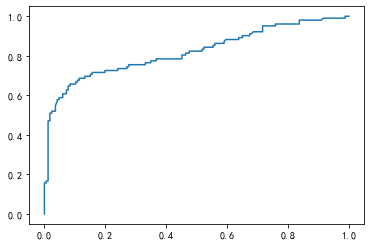

In [19]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)